In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import math
import pickle
import gzip
import sklearn
import graphviz
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
import random
from sklearn.metrics import roc_curve, auc

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
traindf = pd.read_csv('stock_XY_train.csv', engine='python')
#NAs = pd.concat([traindf.isnull().sum()], axis=1)
#print(NAs[NAs.sum(axis=1) > 2000])

#print("Number of rows before drop: ",len(mytrain.index))
#mytrain = mytrain.dropna()
#print("Number of rows after drop: ",len(mytrain.index))

#y = mytrain['Buy']
#X = mytrain.drop(['Buy'],axis=1)

#X.head()

In [4]:
train1 = traindf[['Revenue','Cost of Revenue','Gross Profit','Buy']]
train1 = train1.dropna()
y = train1['Buy']
train1.drop(['Buy'],axis=1,inplace=True)
print("Train1 columns are: ",train1.columns)
X_train, X_test, y_train, y_test = train_test_split(train1, y)
Dectree = DecisionTreeClassifier(max_depth = 3).fit(X_train,y_train)
y_pred = Dectree.predict(X_test)
print("Accuracy score is: ", accuracy_score(y_test,y_pred))

Train1 columns are:  Index(['Revenue', 'Cost of Revenue', 'Gross Profit'], dtype='object')
Accuracy score is:  0.5597729691379922


In [5]:
#We are trying to figure out which parameters are the best to use so we iterate through all parameters and try them against our own,
#We have a variety of arrays to capture data. totals contains the performance and parameters for every decision classifier we make.
#It is a tuple containing lists of performances for every single paramter.
#then Currscore is our average performance of each parameter
#We print out the max of each list in tuple. If we see the same features appearing over and over we know they perform well so we can take them.
#myscoresper = []
totals = []
#myscoresper = []
mycolumns = traindf.columns.tolist()
mycolumns.remove("Buy")
mycolumns.remove("Yr")
mycolumns.remove("Sector")
mycolumns.remove("SG&A Expenses Growth")
mycolumns.remove("R&D Expense Growth")
mycolumns.remove("Book Value per Share Growth")
mycolumns.remove("Inventory Growth")
mycolumns.remove("Receivables growth")
mycolumns.remove("3Y Dividend per Share Growth (per Share)")
mycolumns.remove("5Y Dividend per Share Growth (per Share)")
mycolumns.remove("3Y Shareholders Equity Growth (per Share)")
mycolumns.remove("10Y Dividend per Share Growth (per Share)")
mycolumns.remove("5Y Shareholders Equity Growth (per Share)")
mycolumns.remove("10Y Shareholders Equity Growth (per Share)")
mycolumns.remove("5Y Net Income Growth (per Share)")
mycolumns.remove("3Y Net Income Growth (per Share)")
mycolumns.remove("10Y Net Income Growth (per Share)")
for i in range(2,len(mycolumns)):
    currScore = [mycolumns[i]]
    count = 0
    mySum = 0
    print("I is:", i)
    for j in range (2,len(mycolumns)-2,2):
        count += 1
        currTot = []
        currTotScore = []
        if i not in range(j,j+2):
            #print("Training")
            mytrain = traindf[[mycolumns[i],mycolumns[j],mycolumns[j+1],'Buy']]
            mytrain = mytrain.dropna()
            y = mytrain['Buy']
            mytrain.drop(['Buy'], axis=1,inplace=True)
            #print("I is: ", i, "J is: ",j,"Columns are: ", mytrain.columns)
            X_train, X_test, y_train, y_test = train_test_split(mytrain, y)
            Dectree = DecisionTreeClassifier(max_depth = 3).fit(X_train,y_train)
            y_pred = Dectree.predict(X_test)
            currTotScore.append(mytrain.columns)
            currTotScore.append(accuracy_score(y_test,y_pred))
            mySum += accuracy_score(y_test,y_pred)
            currTot.append(currTotScore)
    totals.append(currTot)
    print("Best from ",currScore[0]," : ", max(currTot,key=lambda item:item[1]))
    currScore.append(mySum/count)
    #print("CurrScore is: ", currScore)
    myscoresper.append(currScore)

        

I is: 2
Best from  Revenue  :  [Index(['Revenue', '3Y Operating CF Growth (per Share)', 'Asset Growth'], dtype='object'), 0.569811320754717]


NameError: name 'myscoresper' is not defined

In [20]:
#Here we are building a classifier with the best parameters, In my experience less seems to work a bit better so why don't we see which 5 parameters
#give us the best performance.

optParamTrain = traindf[[
"Yr",
"SG&A Expenses Growth",
"R&D Expense Growth",
"Book Value per Share Growth",
"Inventory Growth",
"Receivables growth",
"3Y Dividend per Share Growth (per Share)",
"5Y Dividend per Share Growth (per Share)",
"3Y Shareholders Equity Growth (per Share)",
"10Y Dividend per Share Growth (per Share)",
"5Y Shareholders Equity Growth (per Share)",
"10Y Shareholders Equity Growth (per Share)",
"5Y Net Income Growth (per Share)",
"3Y Net Income Growth (per Share)",
"10Y Net Income Growth (per Share)",
]]

mycols = optParamTrain.columns.tolist()
myscores = []

for i in range(200):
    mycurrtrain = []
    mycurrtrain += random.sample(mycols, 7)
    currscore = [mycurrtrain]
    mycurrtrain.append('Buy')
    optParamTrain = traindf[mycurrtrain]
    optParamTrain = optParamTrain.dropna()
    #print("len opt: ",len(optParamTrain))
    y = optParamTrain['Buy']
    #print("len y: ",len(y))
    optParamTrain.drop(['Buy'],axis=1,inplace=True)

    X_train, X_test, y_train, y_test = train_test_split(optParamTrain, y)
    Dectree = DecisionTreeClassifier(max_depth = 5).fit(X_train,y_train)
    y_pred = Dectree.predict(X_test)
    currscore.append(accuracy_score(y_test,y_pred))
    myscores.append(currscore)
    #print("I is",i)
    
print("Max Score is: ",max(myscores))
mymax = max(myscores)

Max Score is:  [['Yr', 'SG&A Expenses Growth', 'Inventory Growth', '3Y Net Income Growth (per Share)', '5Y Shareholders Equity Growth (per Share)', '10Y Dividend per Share Growth (per Share)', '5Y Dividend per Share Growth (per Share)', 'Buy'], 0.6931818181818182]


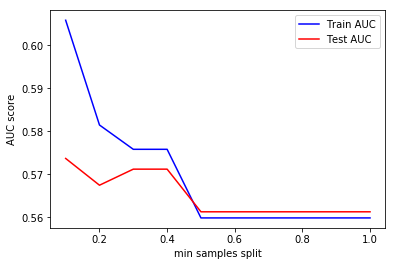

In [7]:
#So we can see we want our max depth at between 2 or 3, our model quickly overfits, Next lets look at min_sample_split

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)   
    train_pred = dt.predict(X_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = dt.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

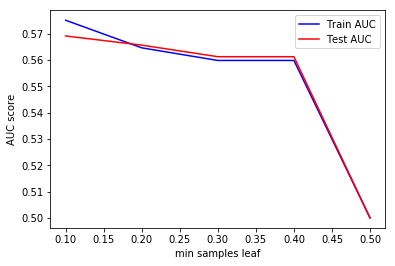

In [8]:
#As we can see it tanks off right around .6 or .7 so we should keep it around there
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)   
    train_pred = dt.predict(X_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = dt.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [21]:
#Awesome We have All our Values, lets see if we can improve our model at all
Dectree = DecisionTreeClassifier(max_depth = 2)
Dectree.fit(X_train, y_train)

y_pred = Dectree.predict(X_test)
print("Score: ", accuracy_score(y_test,y_pred))

Score:  0.5394190871369294


"""
mytrain = traindf[['priceEarningsToGrowthRatio',
'priceBookValueRatio',
'priceToBookRatio',
'priceToSalesRatio',
'priceEarningsRatio',
'priceToFreeCashFlowsRatio',
'priceToOperatingCashFlowsRatio',
'priceCashFlowRatio',
'priceSalesRatio',
'currentRatio',
'quickRatio',
'cashRatio',
'debtRatio',
'debtEquityRatio',
'payoutRatio',
'operatingCashFlowSalesRatio',
'freeCashFlowOperatingCashFlowRatio',
'cashFlowCoverageRatios',
'shortTermCoverageRatios',
'capitalExpenditureCoverageRatios',
'dividendpaidAndCapexCoverageRatios',
'dividendPayoutRatio',
'cashFlowToDebtRatio',
'PE ratio',
'Price to Sales Ratio',
'POCF ratio',
'PFCF ratio',
'PB ratio',
'PTB ratio',
'Buy']]
"""

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

NameError: name 'X' is not defined

In [15]:
#checking for correct array sizes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(2427, 29)
(809, 29)
(2427,)
(809,)


In [29]:

#Source(export_graphviz(Dectree, out_file = None, feature_names = list(X.columns)))
#y_pred = Dectree.predict(X_test)
#print("Score",accuracy_score(y_test,y_pred))

Dectree = DecisionTreeClassifier(max_depth = 3)
crossValScores = cross_val_score(Dectree, X_train, y_train, cv = 5)
print("Cross Valuation Scores for unpruned tree are ", crossValScores)
print("Mean accuracy score is ", crossValScores.mean())
print("Std accuracy score is ", crossValScores.std())

Cross Valuation Scores for unpruned tree are  [0.47119342 0.51440329 0.55257732 0.51958763 0.52989691]
Mean accuracy score is  0.5175317126978066
Std accuracy score is  0.026617077895204417


NameError: name 'prune' is not defined